In [76]:
import sys
sys.path.append('/eos/home-i00/l/lkoller/SWAN_projects/commands/Lya_commands')

from Ltif import Lpicday, Lpic
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn import datasets, metrics, svm

In [63]:
day = Lpicday('23_12_06')
df = day.clusters_day(min_size = 100)

100%|██████████| 474/474 [00:21<00:00, 22.18it/s]


In [64]:
cl = [val for bal in list(df['cluster']) for val in bal if len(val) > 0]

max_h, max_w = 53, 42

for item in [val for bal in cl for val in bal]:
    while len(item) < max_w:
        item += [0]

for item in cl:
    while len(item) < max_h:
        item += [[0] * max_w]
        
ac = np.array(cl)

data = ac.reshape(118, -1)

In [92]:
clf = load('/eos/user/l/lkoller/ML models/clust_num.txt')

In [93]:
clf.predict(data)

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1])

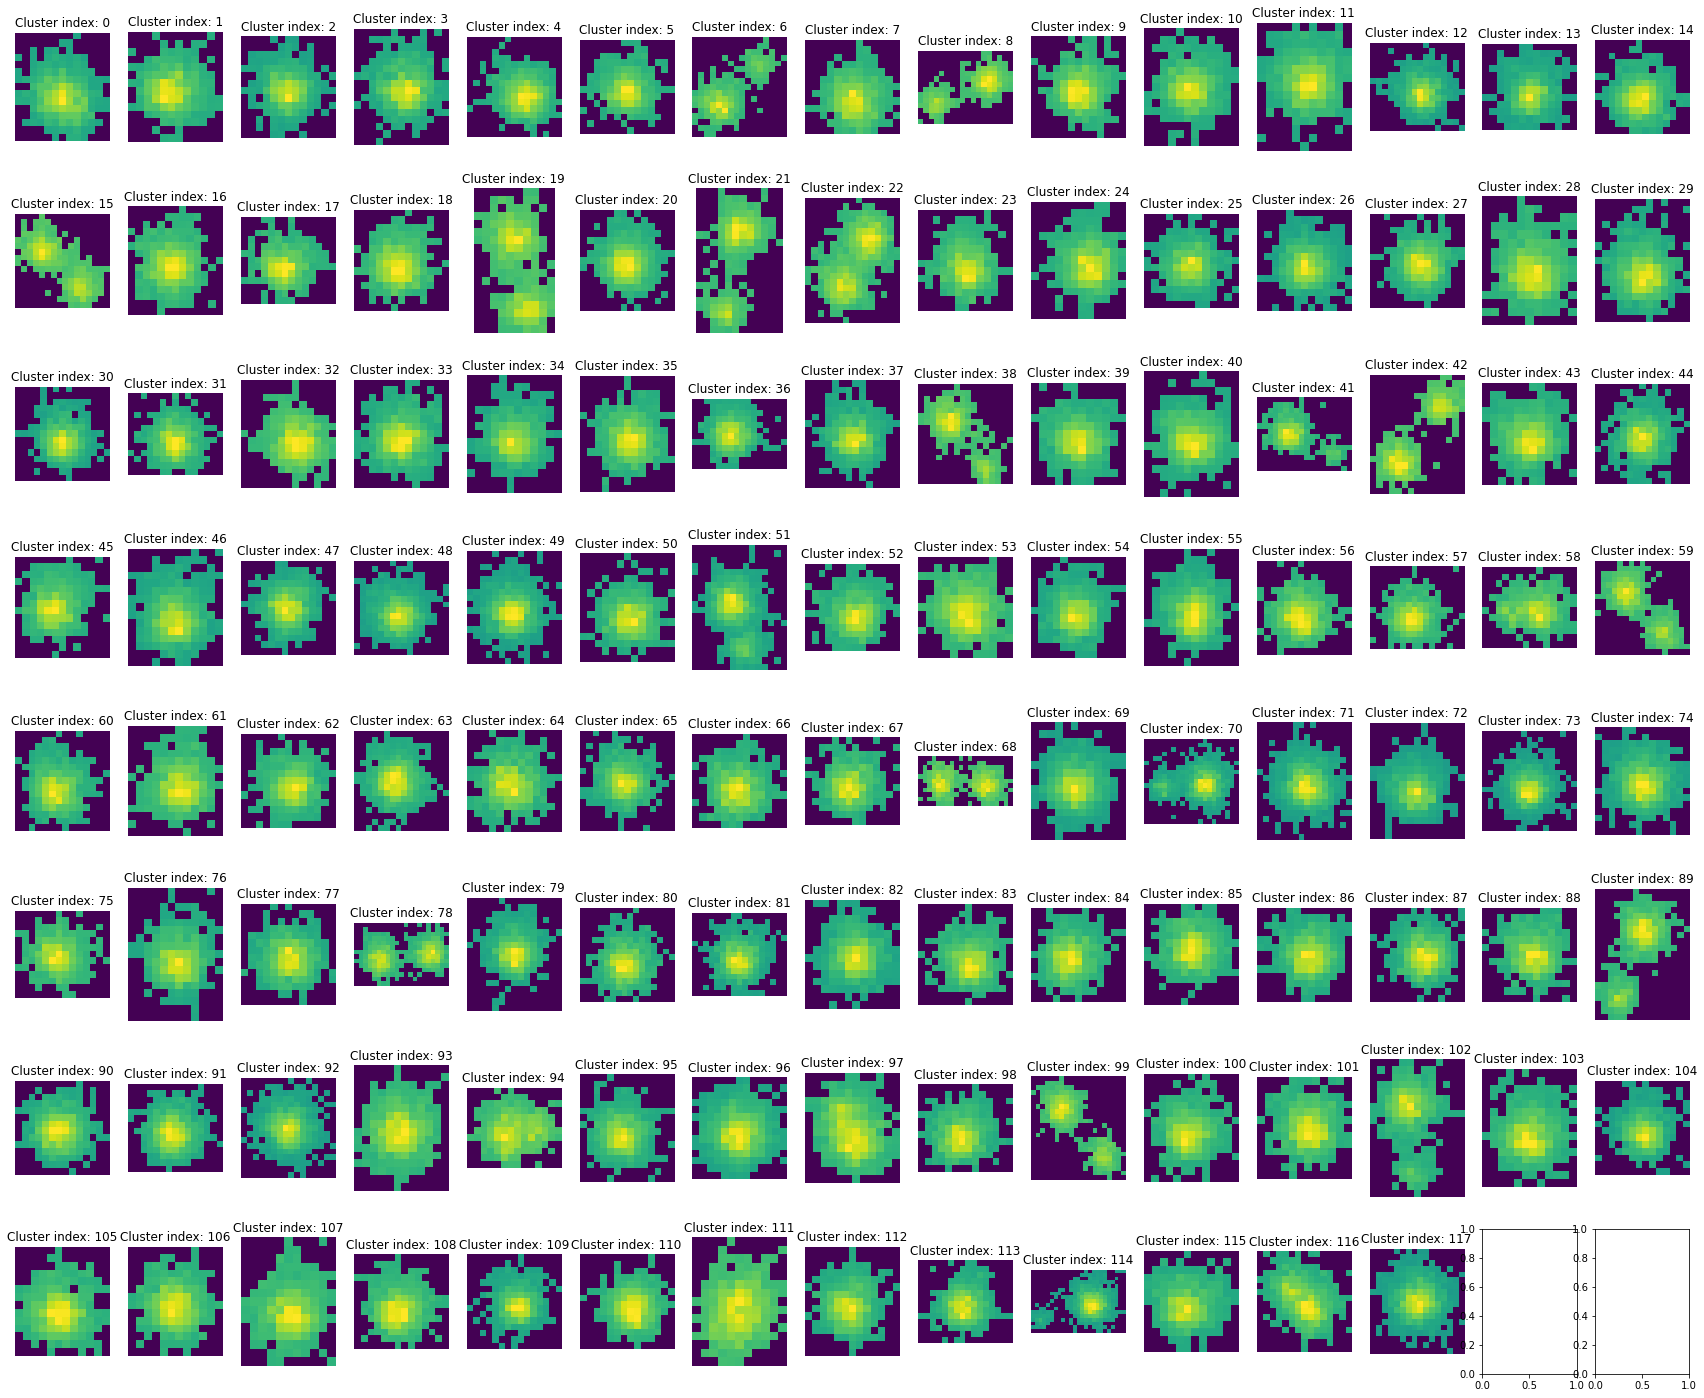

In [88]:
rows, cols = 8, 15

_, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (30,25))


for i in range(rows):
    for ax, image, label in zip(axes[i], cll[cols * i:], list(df.index)[cols * i:]):
        ax.set_axis_off()
        ax.imshow(image, interpolation = 'nearest')
        ax.set_title('Cluster index: %i' % label)

In [149]:
target = [1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,2,1,1,1,2,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,2,1,1,
         1,1,1,1,1,1,2,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,2,
         1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1]

clf.fit(data,target)

SVC()

In [151]:
predicted = clf.predict(data)

target = np.array([1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,2,1,1,1,2,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,2,1,1,
         1,1,1,1,1,1,2,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,2,
         1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1])

In [95]:
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1])

In [102]:
list(enumerate(predicted == target))

ind = [val[0] for val in list(enumerate(predicted == target)) if val[1] == False]

In [108]:
ind

[6, 15, 19, 21, 22, 38, 41, 51, 58, 59, 89, 102]

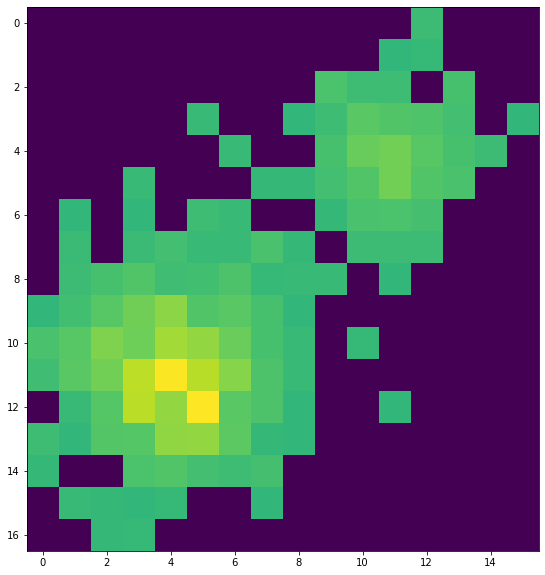

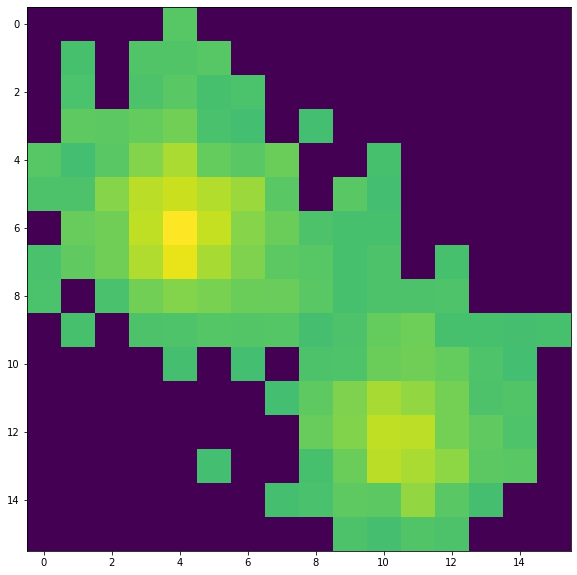

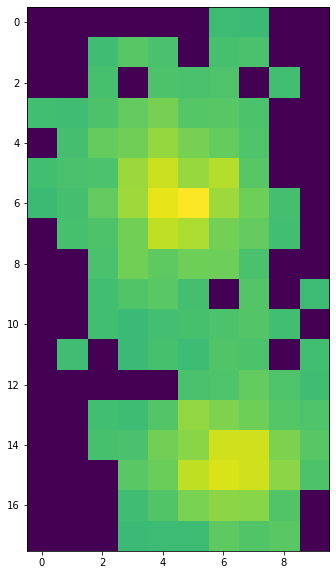

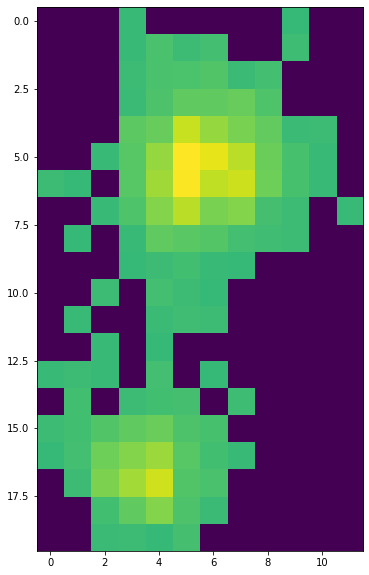

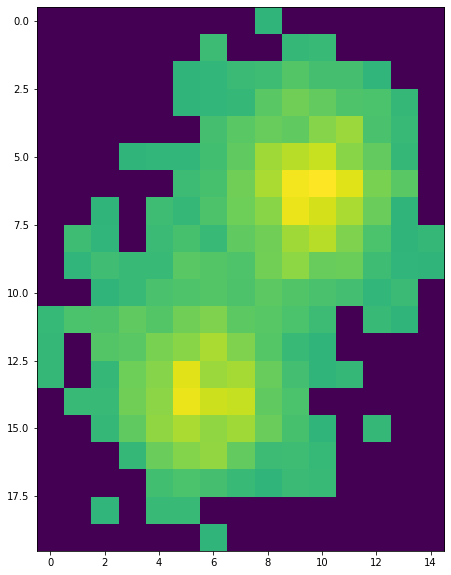

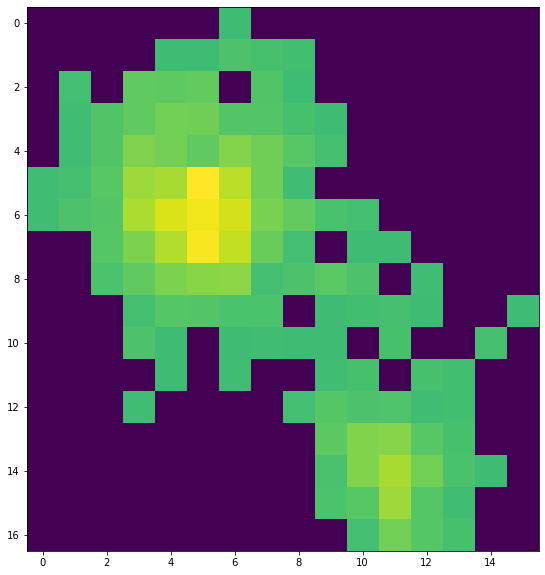

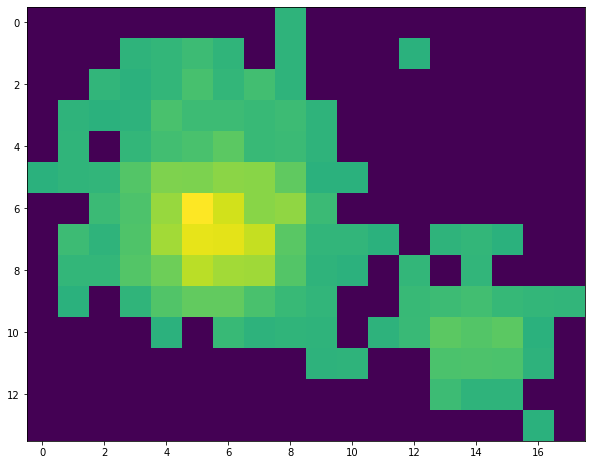

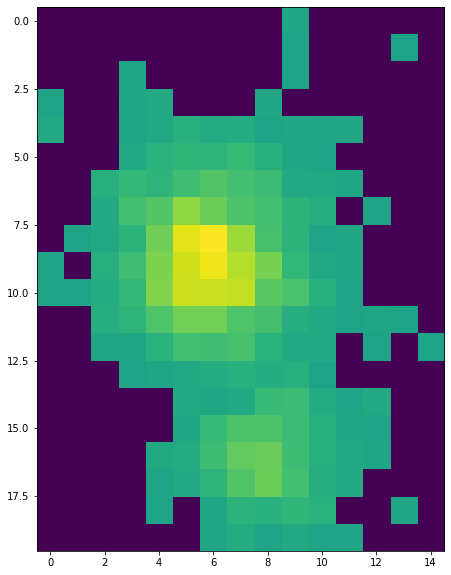

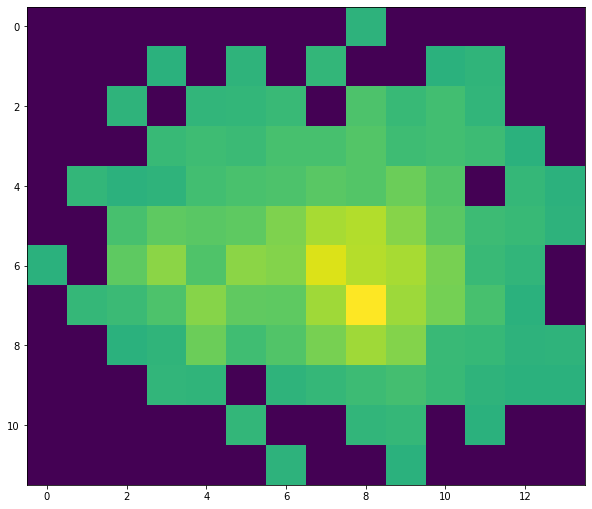

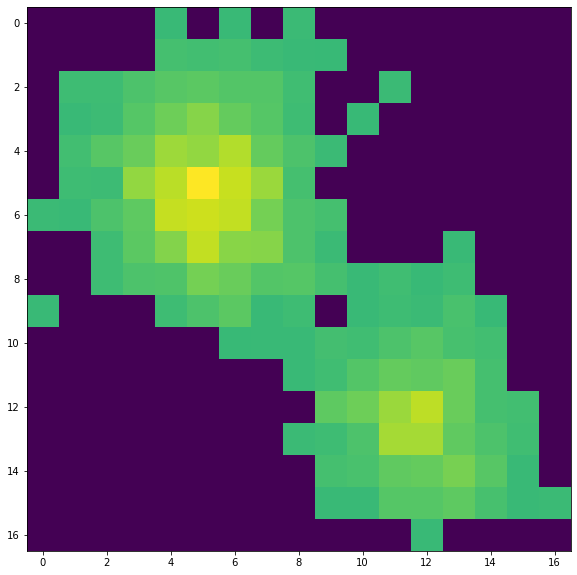

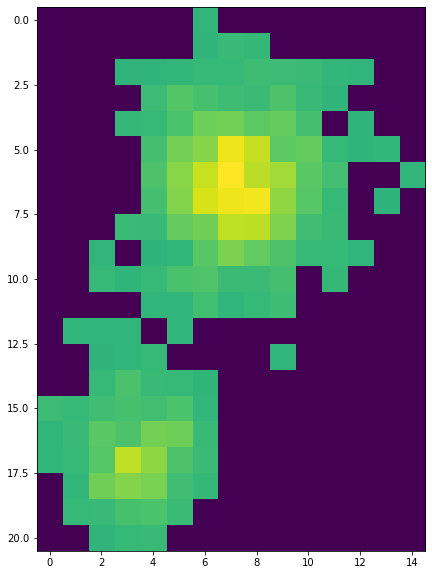

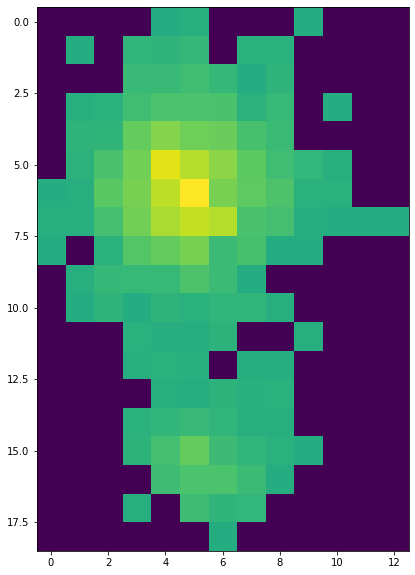

In [110]:
for i in ind:
    plt.figure(figsize = (10,10))
    plt.imshow(cll[i])

In [109]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(target, predicted)}\n"
)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           1       0.89      1.00      0.94        99
           2       1.00      0.37      0.54        19

    accuracy                           0.90       118
   macro avg       0.95      0.68      0.74       118
weighted avg       0.91      0.90      0.88       118




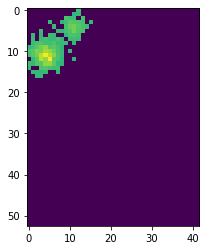

In [69]:
plt.imshow(cl[6])

In [36]:
df['cluster'][0]

[]

In [32]:
axes

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

In [160]:
df = day.clusters_day(min_size = 80)

100%|██████████| 474/474 [00:22<00:00, 21.03it/s]


In [161]:
cll = [val for bal in list(df['cluster']) for val in bal if len(val) > 0]
sll = [val for bal in df['size'] for val in bal]
cy = []
pos = []
for i in range(len(cll)):
    if sll[i] < 100:
        pos += [i]
        cy += [cll[i]]

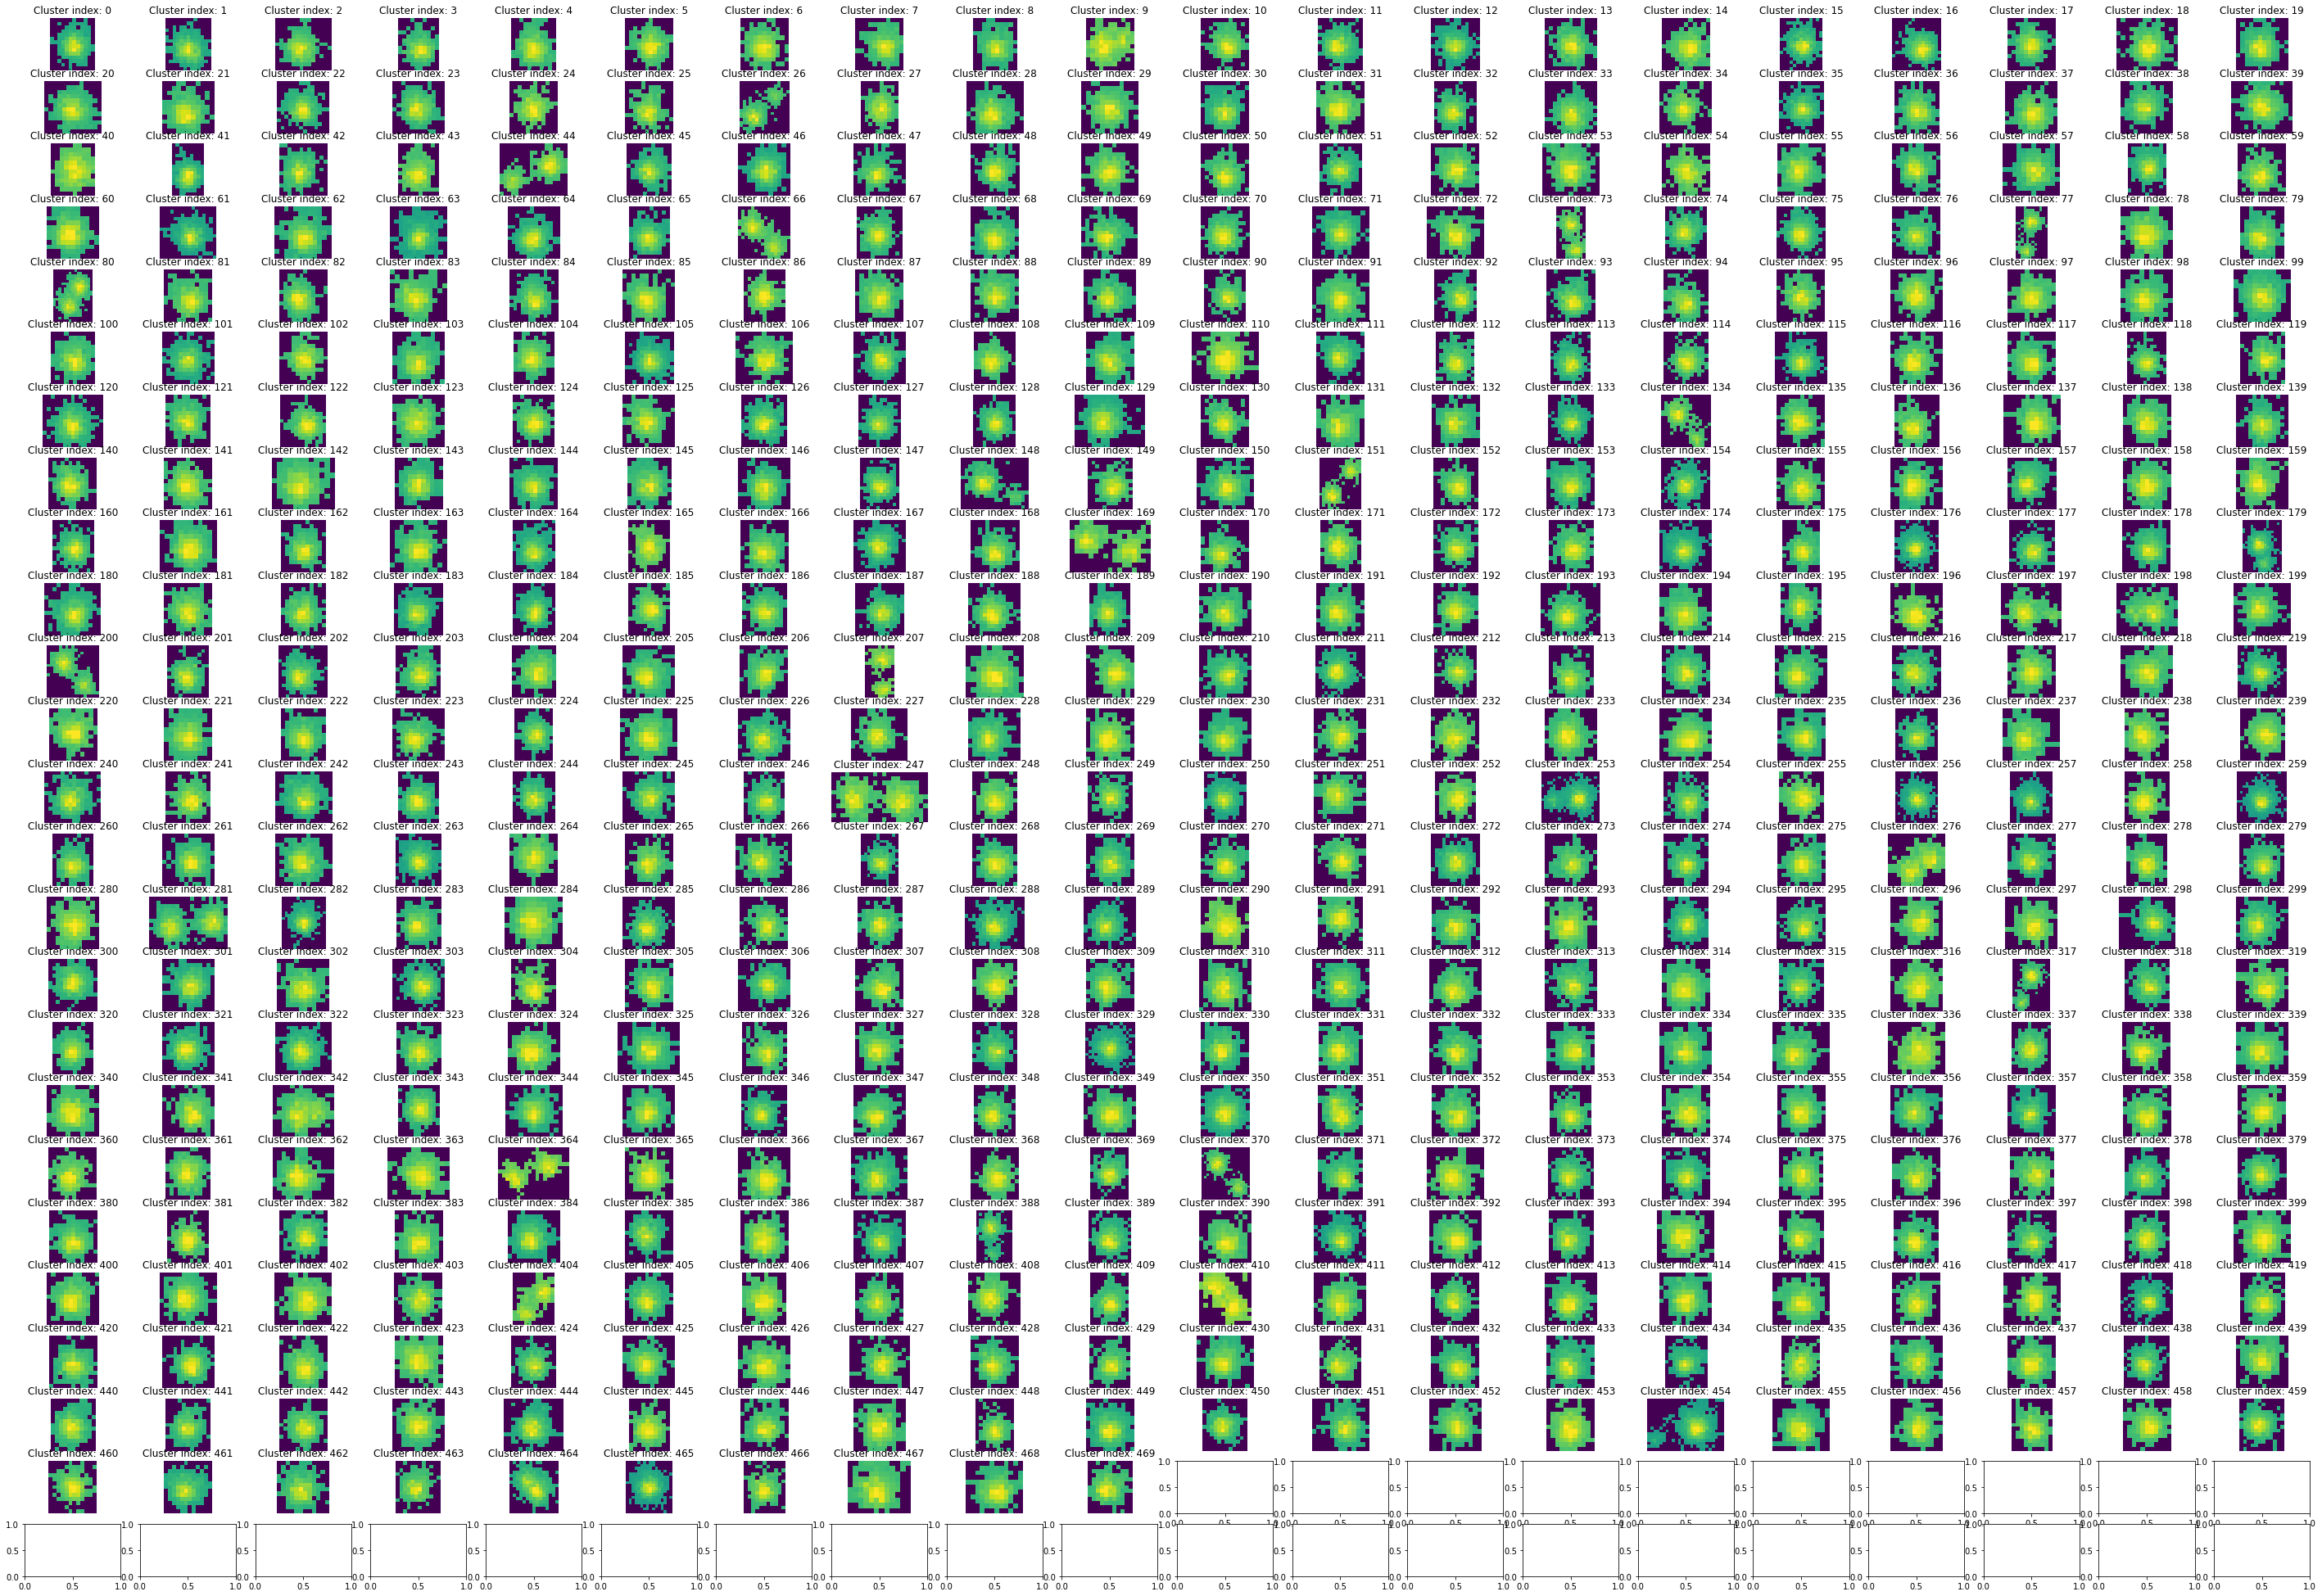

In [162]:
rows, cols = 25, 20

_, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (50,35))


for i in range(rows):
    for ax, image, label in zip(axes[i], cll[cols * i:], list(df.index)[cols * i:]):
        ax.set_axis_off()
        ax.imshow(image, interpolation = 'nearest')
        ax.set_title('Cluster index: %i' % label)

In [140]:
sll[pos[121]], sll[pos[145]], sll[pos[198]], sll[pos[266]], sll[pos[297]], sll[pos[302]]

(97, 84, 89, 96, 90, 80, 139)

In [141]:
max_h, max_w = 53, 42

for item in [val for bal in cy for val in bal]:
    while len(item) < max_w:
        item += [0]

for item in cy:
    while len(item) < max_h:
        item += [[0] * max_w]
        
cy = np.array(cy)

data2 = cy.reshape(352, -1)

In [147]:
target2 = np.zeros(352) + 1
target2[[121,145,198,266,297,302]] = 2

In [150]:
predicted2 = clf.predict(data2)
predicted2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [152]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(target2, predicted2)}\n"
)

Classification report for classifier SVC():
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99       346
         2.0       0.60      0.50      0.55         6

    accuracy                           0.99       352
   macro avg       0.80      0.75      0.77       352
weighted avg       0.98      0.99      0.99       352




In [155]:
ind2 = [val[0] for val in list(enumerate(predicted2 == target2)) if val[1] == False]
ind2

[171, 198, 204, 297, 302]

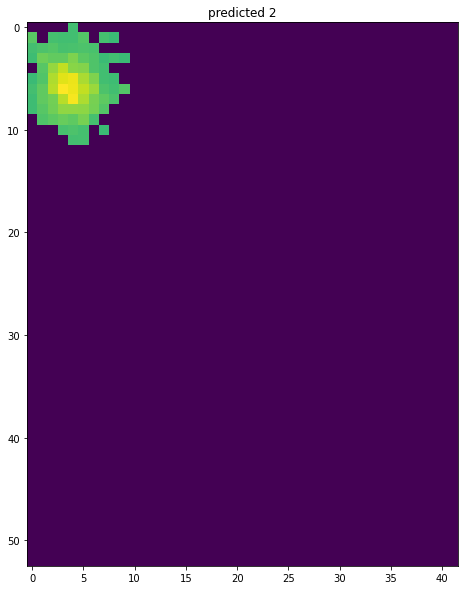

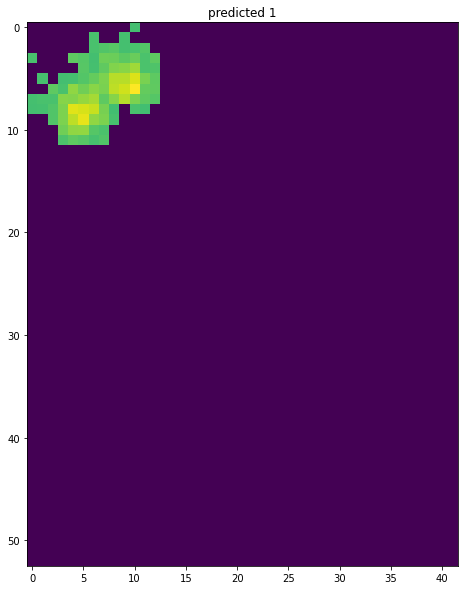

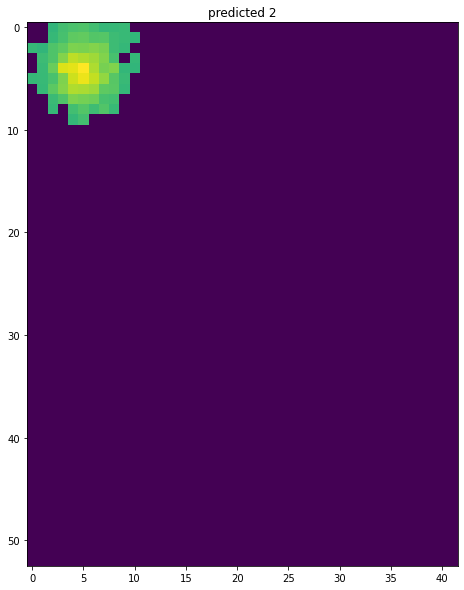

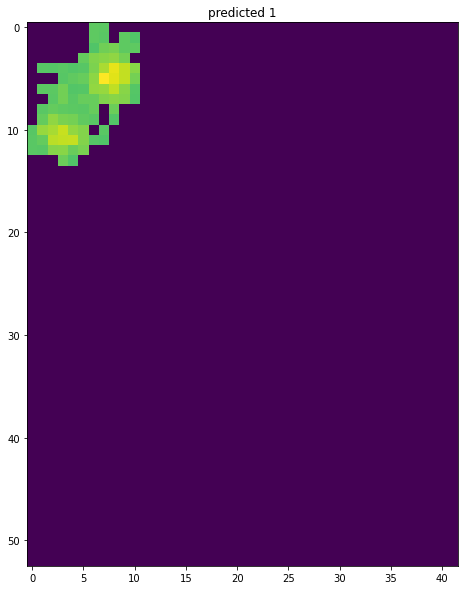

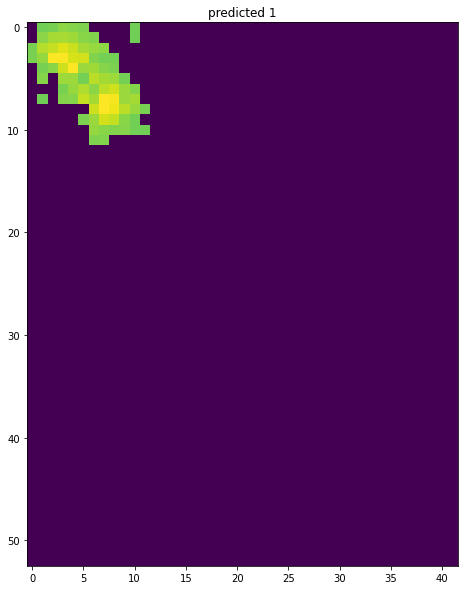

In [159]:
for i in ind2:
    plt.figure(figsize = (10,10))
    plt.imshow(cy[i])
    plt.title('predicted %i' % predicted2[i])

In [ ]:
target = np.array([1,1,1,2,1,1,1,1,1,1,2,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,2,1,1,1,2,1,1,1,1,1,1,1,
                  1,1,1,2,1,2,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,2,1,2,2,1,
                  1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,2,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,3,
                  1,1,1,1,1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,
                  2,1,2,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,2,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,1,2,1,5,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,1,2,1,2,2,1,1,1,1,2,2,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,1,2,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,2,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,
                  1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,
                  1,2,1,1,3,2,2,1,2,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,2,1,1,2,2,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,2,
                  1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,2,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,2,
                  1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1])